$$\LARGE\text{PROJECT 0: Inaugural project}$$



$  \underline{\text{QUESTION 1} \hspace{0.5cm} \text{Solve household problem}}$

First step in solving this problem is to import the optimize module. The parametervalues are listed in 1.1.
The objective function I want to maximize is named "value_of_choice" and is defined in 1.2. A multi-dimensional constrained solver is used. 

We are given three constraints in the problem, which I have reduced down to one constraint by substituting. The result is

$$m = \tau(p_h,\tilde p_h) + c = rp_h + \tau^g h\epsilon +\tau^p \cdot max\{h\epsilon - \bar p\},$$

which is added to the code in 1.3 where i define the constraint. 

In [61]:
from scipy import optimize

#1.1 settings
phi = 0.3
eps = 0.5
r = 0.03
tau_g = 0.012
tau_p = 0.004
pbar = 3
m = 0.5

#1.2 Define objective function
def value_of_choice(x, phi, eps, r, tau_g, tau_p, pbar, m):
    h = x[0]
    c = x[1]
    u_func=x[1]**(1-phi)*x[0]**phi
    return -u_func

#1.3 Constraint
constraints = ({"type": "ineq", "fun": lambda x: m - (x[1]+ r*x[0] + tau_g*x[0]*eps + tau_p*max(x[0]*eps-pbar,0))})

#1.4 Call solver
initial_guess = [1, 1]
sol = optimize.minimize(value_of_choice, initial_guess, args=(phi, eps, r, tau_g, tau_p, pbar, m), method="SLSQP", constraints=constraints)
h = sol.x[0]
c = sol.x[1]
u = c**(1-phi)*h**phi

#1.5 print solution
check = m - c - (r*h + tau_g*h*eps + tau_p*max(h*eps-pbar,0))
print(f'h = {h:.2f}, c = {c:.3f} --> u = {u:.3f}') 
print(f'check = {check:.9f}') 
print("")
print("Comments:")
print(f'The optimal choice of housing is {h:.2f} and optimal choice of other consumption is {c:.3f}. This gives an utility of {u:.3f}. Since output of "check" is zero, it can be concluded that the solution is quite precise (all income (cash-on-hand) is spent on both goods.')


h = 4.17, c = 0.350 --> u = 0.736
check = -0.000000000

Comments:
The optimal choice of housing is 4.17 and optimal choice of other consumption is 0.350. This gives an utility of 0.736. Since output of "check" is zero, it can be concluded that the solution is quite precise (all income (cash-on-hand) is spent on both goods.


$  \underline{\text{QUESTION 2} \hspace{0.5cm} \text{Plot optimal values as functions of} \hspace{0.15cm}\textit{m}}$


This problem illustrates the relationsship between optimal choices of housing and consumption at different levels of cash-on-hand. Two graphs are set up; first is the relationsship between housing and cash-on-hand, second is the relationsship between consumption and cash-on-hand.

In order to work with numerical data and report the results in figures, it is required that numpy and matplotlib modules are imported. This is done in 2.1.


Comments:
Both optimal housing and consumption are increasing in m (cash-on-hand).



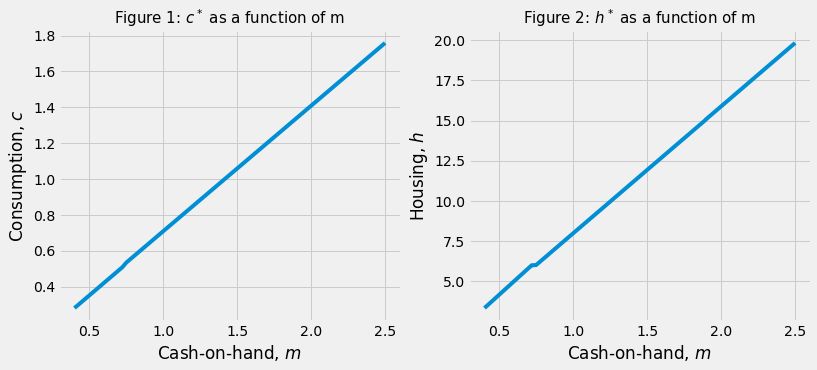

In [58]:
#2.1 import modules
import numpy as np
import matplotlib.pyplot as plt

#2.2 settings
N = 1000 #number of elements
m_min = 0.4 #minimum value of m
m_max = 2.5 #maximum value of m

# allocate numpy arrays (grids)
m_vec = np.linspace(0.4,2.5,1000) #a grid running from 0.4 to 2.5 using 1000 elements/points
h_vec = np.empty(N) #empty grid since it is h (housing) I am solving for
c_vec = np.empty(N) #same her, but for c (other consumption)

#2.3 Define opt problem
def solution_(phi, eps, r, tau_g, tau_p, pbar, m):
    sol = optimize.minimize(value_of_choice, initial_guess, 
                            args=(phi, eps, r, tau_g, tau_p,
                            pbar, m), method="SLSQP",
                            constraints=constraints)
    h = sol.x[0]
    c = sol.x[1]
    u = c**(1-phi)*h**phi
    return h, c, u

for i,m in enumerate(m_vec): #loop over m_vec
    hey = solution_(phi, eps, r, tau_g, tau_p, pbar, m)
    h_vec[i] = hey[0] 
    c_vec[i] = hey[1]

#2.2 Plot the curves
fig = plt.figure(figsize=(12,5)) 
plt.style.use('fivethirtyeight')

#b. Figure 1
ax_fig1 = fig.add_subplot(1,2,1)
ax_fig1.plot(m_vec,c_vec)
ax_fig1.set_title('Figure 1: $c^*$ as a function of m', fontsize=15)
ax_fig1.set_xlabel('Cash-on-hand, $m$')
ax_fig1.set_ylabel('Consumption, $c$')
ax_fig1.grid(True)

#c. Figure 2
ax_fig2 = fig.add_subplot(1,2,2)
ax_fig2.plot(m_vec,h_vec)
ax_fig2.set_title('Figure 2: $h^*$ as a function of m', fontsize=15)
ax_fig2.set_xlabel('Cash-on-hand, $m$')
ax_fig2.set_ylabel('Housing, $h$')
ax_fig2.grid(True)
print("")
print("Comments:")
print("Both optimal housing and consumption are increasing in m (cash-on-hand).")
print("")

$  \underline{\text{QUESTION 3} \hspace{0.5cm} \text{Average tax burden per household}}$


I start off by defining the vector of random cash-on-hand levels followed by a function named "Total_tax" to calculate the total tax burden for all 10.000 households. Total taxes is calculated by inserting a "for loop" that calculates the optimal level of housing for every household $i$ with cash on hand level $m_i$. Average tax burden is calculated by dividing the total tax with total number og households. 

In [59]:
#3.1 parameters
phi = 0.3
eps = 0.5
r = 0.03
tau_g = 0.012
tau_p = 0.004
pbar = 3

np.random.seed(1) #seed number is set to 1
m_i = np.random.lognormal(-0.4, 0.35, size=10000)

#3.2 Defining total tax function 
def Tot_tax(m_i, phi, eps, r, tau_g, tau_p, pbar):
    N=len(m_i)
    tax_i = np.zeros((N))

    for i,m in enumerate(m_i): 
        OPT = solution_(phi, eps, r, tau_g, tau_p, pbar, m)
        h_vec = OPT[0]
        #individual tax payment based on optimal labour
        tax_i[i] = tau_g*eps*h_vec+tau_p*max(eps*h_vec-pbar,0) #this is the tax for household i
    
    Total_taxes = sum(tax_i)
    
    return Total_taxes/10000

#c. Calculate average
Average = Tot_tax(m_i, phi, eps, r, tau_g, tau_p, pbar)
print(f'Average tax burden per household is {Average:.5f}.')

Average tax burden per household is 0.14662.


$  \underline{\text{QUESTION 4} \hspace{0.5cm} \text{Average tax burden per household}}$


This problem is solved similar to question 3. The only difference is that the parameters for the tax system on housing are changed. The new parametervalues are coded in 4.1. 

In [62]:
#4.1 new parametervalues
eps = 0.8
tau_g = 0.01
tau_p = 0.009
pbar = 8
    
#a. Defining vector of random m
np.random.seed(1)
m_i = np.random.lognormal(-0.4, 0.35, size=10000)

#3.2 Defining total tax function 
def Tot_tax1(m_i, phi, eps, r, tau_g, tau_p, pbar):
    N=len(m_i)
    tax_i1 = np.zeros((N))

    for i,m in enumerate(m_i): 
        OPT = solution_(phi, eps, r, tau_g, tau_p, pbar, m)
        h_vec = OPT[0]
        #individual tax payment based on optimal labour
        tax_i1[i] = tau_g*eps*h_vec+tau_p*max(eps*h_vec-pbar,0) #this is the tax for household i
    
    Average_taxes = sum(tax_i1)/10000
    
    return Average_taxes #return average, 10000 is the number of households

#c. Calculate average
Average = Tot_tax1(m_i, phi, eps, r, tau_g, tau_p, pbar)
print(f'Average tax burden per household is {Average:.5f}')
print("The reform of the tax system on housing increases tax burden per household.")

Average tax burden per household is 0.03154
The reform of the tax system on housing increases tax burden per household.


$  \underline{\text{QUESTION 5} \hspace{0.5cm} \text{Optimize tax_g}}$


A function that optimizes the level of $\tau_g$ is defined such that average tax payments are unchanged from before the reform.

In [56]:
phi = 0.3
eps = 0.5
r = 0.03
tau_p = 0.004
pbar = 3

def tax(tau_ny_g, phi, eps, r, tau_p, pbar, m_i):
    
    # a. all income not spent on the first good
    #    is spent on the second
    
    # b. the resulting utility is
    
    return Tot_tax(m_i, phi, eps, r, tau_g, tau_p, pbar)

# b. make value-of-choice as a funciton of only x1 
obj = lambda tau_ny_g: tax(tau_ny_g, phi, eps, r, tau_p, pbar, m_i)
# c. call minimizer
sol = optimize.minimize_scalar(obj,bounds=(0,1))
# d. print result
tau_ny_g = sol.x
print(tau_ny_g)

2.6180339603380443
